## Survival analysis and censored data

#### Simulation

- Quantity of interest: time to recovery
- Make sure the survival time is random

In [2]:
n <- 500
recover_mean <- 10
durations <- rexp(n, 1/recover_mean)

In [3]:
mean(durations)

[1] 9.838334

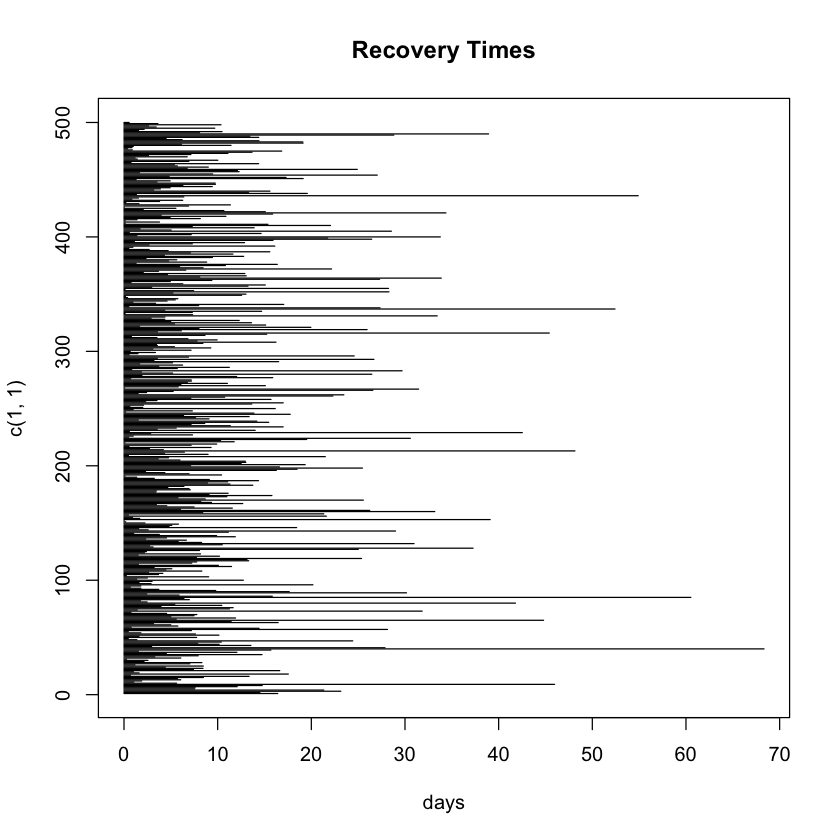

In [4]:
plot(c(1, 1), type="n", xlim=c(0, max(durations)),
     ylim=c(0, n + 1), main="Recovery Times", xlab='days')
segments(x0=0, x1=durations,
         y0=seq_len(n), y1=seq_len(n))

#### What is the average recovery time? With perfect data, our usual techniques work!

As a statistician, what would you report?

In [5]:
mean(durations)

[1] 9.838334

In [6]:
se <- sd(durations) / sqrt(n)

In [7]:
c(mean(durations) - 1.96 * se, mean(durations) + 1.96 * se)

[1]  8.97630 10.70037

In [8]:
num_sim <- 5000
output <- rep(NA, num_sim)
for(i in seq_len(num_sim)){
    durations_boot <- sample(durations, n, replace=TRUE)
    output[i] <- mean(durations_boot)
}

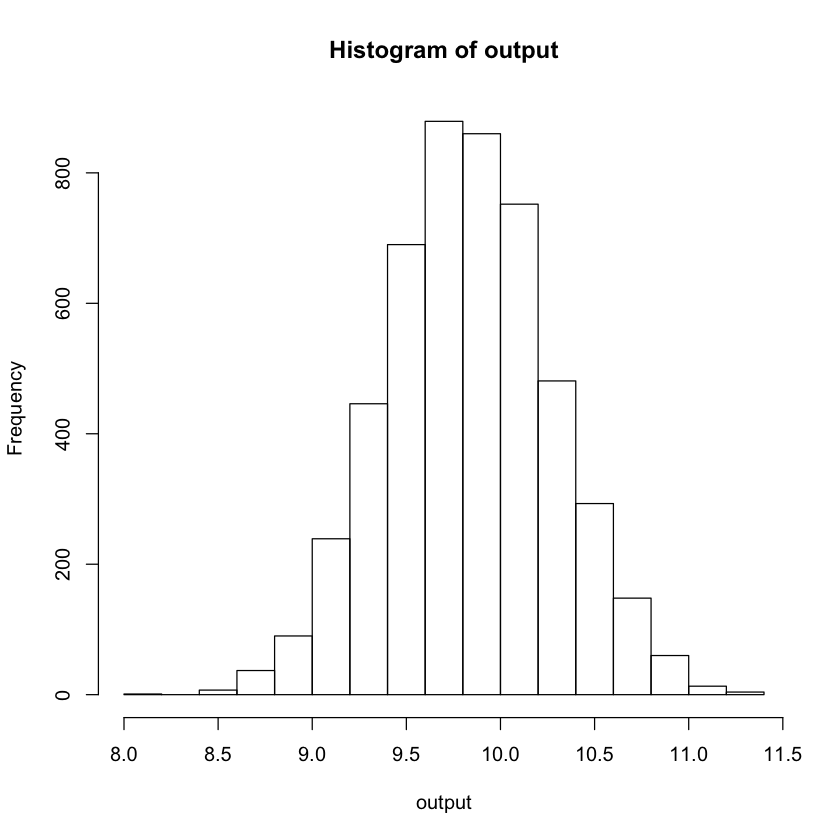

In [9]:
hist(output)

### How can we model recovery time from a disease given the data above?

- I'm sick, will recovery take longer than $t=10$?
- What's the chance I'll need to take fewer than 2 days off work?

$$P(T \geq 10)?$$

In [39]:
sum(durations >= 10) / n

[1] 0.364

In [21]:
mean(durations >= 2)

[1] 0.788

Now please create a "model" that takes in a time, $t$, and returns the probability of someone's recovery taking longer than $t$. Let's say the time to recovery is a random variable $T$.
- Translate the above request into a mathematical expression
- Write the function that estimates the mathematical quantity, make sure the function can take in a vector of different $t$ values

In [10]:
surv_fun <- function(t, durations){
    sapply(t, function(ti) mean(durations > ti))
}

In [12]:
possible_times <- seq(0, max(durations), length.out = 100)

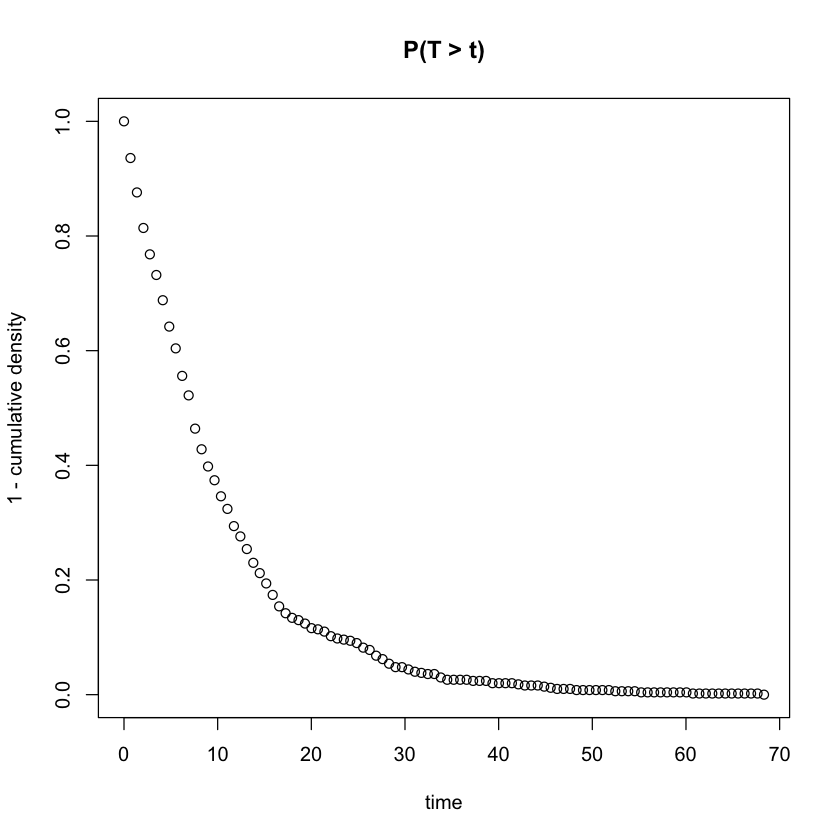

In [14]:
# Both methods produce the same answer
plot(possible_times, surv_fun(possible_times, durations), xlab="time",
    ylab="1 - cumulative density", main="P(T > t)")

$P(T>t)$ is also referred as the "survival function", $S(t)$, which you can think of as the virus's survival.

There is a simple connection between the cumulative density of the survival times with the survival function. Namely, 

$$P(T>t) = S(t) = 1 - F(t) = 1 - P(T \leq t)$$

#### What happens if your experiment could only run until time=20?

- How can we simulate this phenomenon?

In [14]:
censored_time <- 20
censored <- durations >= censored_time
censored_duration <- ifelse(censored, censored_time, durations)

[1] 500

#### If you only had the censored data, for the problem of estimating average durations, can you
- Use the data as is (e.g. assume they recovered at censored time)?
- Drop the censored data points?
- Which method above is better?

#### What if everyone gets bored at different random times and decides to drop out of the study, i.e. the censoring is random?

In [16]:
bored_time <- rexp(n, 0.1)
censored <- durations >= bored_time
censored_duration <- ifelse(censored, bored_time, durations)

#### What are the impacts of the random censoring?

#### Visualize the impact of censoring on the survival curve by plotting the censored and uncensored data together.
Pick which ever type of censoring you wish to study

In [17]:
# ecdf = Empirical Cumulative Density Function = P(T <= t) = 1 - P(T > t)
censored_surv_prob <- function(x) 1 - ecdf(censored_duration)(x)

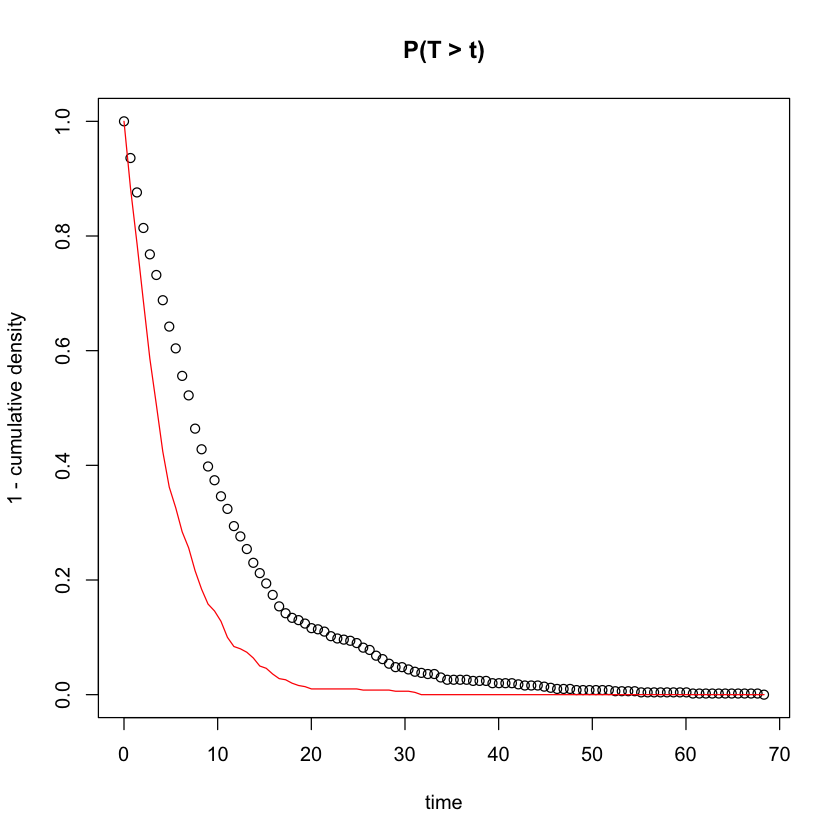

In [18]:
# Both methods produce the same answer
plot(possible_times, surv_fun(possible_times, durations), xlab="time",
    ylab="1 - cumulative density", main="P(T > t)")
lines(possible_times, censored_surv_prob(possible_times), xlab="time",
    ylab="1 - cumulative density", main="P(T > t)", col="red")

### Can you explain the difference?

### New Simulation
- Let's create a binary variable, `treated`, such that subjects who are treated have half the recovery time than those untreated.  Recreate the duraion dataset.

In [23]:
treated <- sample(c(TRUE, FALSE), n, replace=TRUE)
recover_rate <- 0.1
duration <- ifelse(treated,
                   rexp(n, recover_rate * 2),
                   rexp(n, recover_rate))

#### Plot the recovery times but color the lines by their treatment status

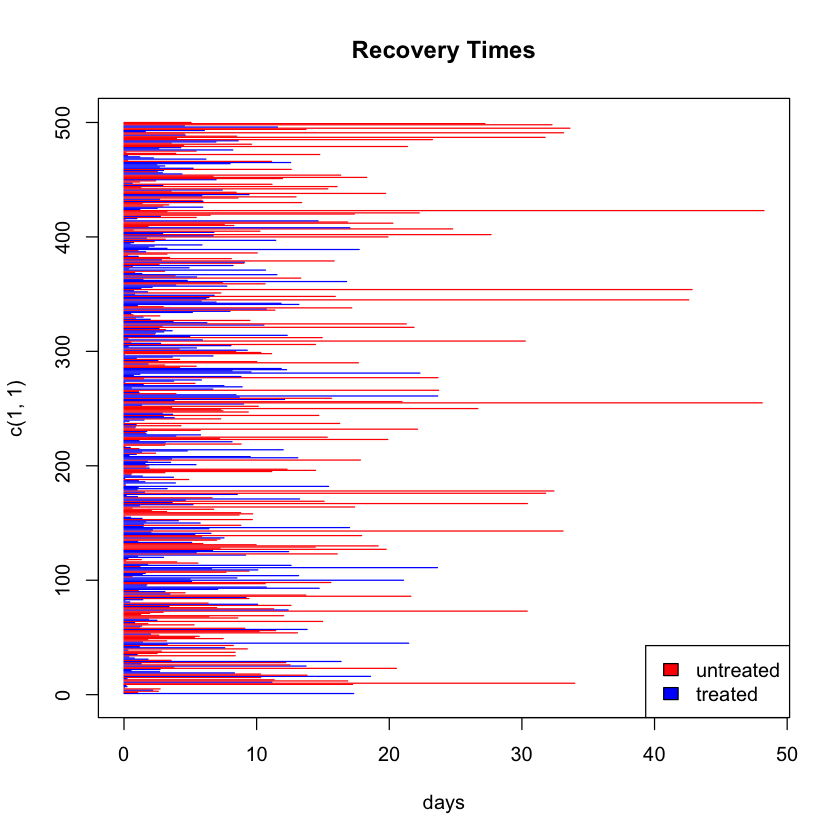

In [24]:
plot(c(1, 1), type="n", xlim=c(0, max(duration)),
     ylim=c(0, n + 1), main="Recovery Times", xlab='days')
segments(x0=0, x1=duration,
         y0=seq_len(n), y1=seq_len(n),
         col=c("red", "blue")[treated+1])
legend("bottomright", fill=c("red", "blue"), legend=c("untreated", "treated"))

#### How would you detect the impact of the treatment, if you had perfect data?

In [25]:
mean(duration[treated]) - mean(duration[!treated])

[1] -5.067844

In [26]:
mean(duration[!treated])

[1] 10.23877

#### Please show the impact of censoring on your estimates

In [30]:
bored_time <- rexp(n, 0.05)
censored <- duration >= bored_time
censored_duration <- ifelse(censored, bored_time, duration)

In [33]:
mean(censored_duration[treated]) - mean(censored_duration[!treated])

[1] -2.223073

In [34]:
mean(censored_duration[!treated])

[1] 6.374224

In [35]:
mean(censored_duration[treated])

[1] 4.151151

In [36]:
mean(duration[treated])

[1] 5.170931

In [37]:
mean(censored[treated])

[1] 0.1992337

In [38]:
mean(censored[!treated])

[1] 0.3556485